# Preprocesamiento de Datos

### 1. A la hora de preparar los datos antes de ser entrenados existen tres acciones básicas a realizar. Explicar en qué consiste cada una de las siguientes y cómo se implementarían en Python:

#### a. Mean subtraction
Es una acción que se realiza como acción previa a obtener una normalización en los datos del dataset. Por ejemplo, para el entrenamiento de un modelo con imágenes, se podría calcular una media de todas las imágenes en base a alguna variable/propiedad (O variables/propiedades, como podrían ser los canales de colores) y luego tomar esa/s media/s como referencia para realizar una normalización en los datos (Acción que se puede realizar en el dataset completo o en batches, dependiendo de la necesidad o bien de las limitaciones del sistema en el que se está apoyando el entrenamiento del modelo). La motivación de estas acciones es la de obtener un dataset con datos que hagan el entrenamiento del modelo lo más preciso posible, cosa que no sería posible si los datos tuvieran diferencias groseras en las variables/propiedades que se tienen en cuenta para la clasificación de los mismos.
En python, y basándonos en el ejemplo dado, esto se podría realizar apoyándose en la librería numpy, procesando un array de imagenes con np.ndarray (Las imágenes tendrían que tener el mismo tamaño) para una cantidad de canales dada. Luego, iterando el arreglo de imágenes con OpenCV podríamos asignar a cada elemento del dataset armado con las medias la imagen para su normalización.

#### b. Normalization
La normalización involucra ajustar los valores medidos en diferentes escalas respecto a una escala común, generalmente realizada luego de realizar promedios. Esto se realiza para que los valores de la variable estén en un rango definido. Se debe tener especial cuidado en este paso para no arruinar los datos ya que eso arruinaría su posterior análisis y entrenamiento del modelo.
La normalización hace que las características de interés del dataset sean más consistentes entre ellas, lo que permite en definitiva que el modelo pueda predecir sus salidas con mayor precisión.
En python podemos apoyarnos en el paquete preprocessing de la librería sklearn, utilizando el método normalize y pasandole el dataset.

#### c. Scaling
El scaling es un proceso de transformación que se realiza cuando la variable a ser observada del dataset tiene grandes diferencias (O una gran homogeneidad), lo que puede dificultar grandemente el entrenamiento preciso del modelo.
En python se podría realizar con la librería sklearn.preprocessing, utilizando el StandardScaler y llamando a StandardScaler.fit() con el array de datos (Esto aplica un escalado de tipo z-score, por ejemplo).

### 2. Cuando trabajamos con datos de muchas dimensiones, suele ser necesario reducir esta dimensionalidad sin perder mucha información de nuestros datos. Investigar las técnicas PCA, t-SNE y UMAP.
- PCA (Principal Component Analysis): La idea principal detrás de PCA es reducir la dimensión de un dataset que contiene muchas variables correlacionadas, ya sea de manera fuerte o débil, manteniendo la variación presente en el dataset al máximo. Esto se logra transformando las variables a un nuevo set de variables (Lo que se conoce como Componentes Principales y son ortogonales), ordenadas de tal forma para que la retención de variación presente en las variables originales se decrementa a medida que se avanza en el orden de los datos. Entonces, el primer componente retiene la variación máxima que estaba presente en el componente original. Los principales componentes son los vectores propios de la matriz de co-variación (Por lo que, son ortogonales).
    Es importante destacar que un dataset en el que se aplique PCA debe ser escalado. Por ejemplo, si consideramos un dataset con datos de vinos, donde cada vino está descrito por sus atributos (color, vintage, etc), se incrementa la redundancia ya que muchos de ellos se medirán con respecto a sus atributos en común. Lo que realizará PCA en este caso será resumir los vinos que posean menos características en común.
    Intuitivamente entonces se puede concluir que PCA nos brinda una proyección o “sombra” de estos elementos vistos desde su punto de vista más informativo.
- t-SNE (t-Distributed Stochastic Neighbor Embedding): Es una técnica no supervisada y no lineal utilizada principalmente en la exploración y visualización de datos de grandes dimensiones. Es decir, nos da la sensación o intuición de cómo están organizados los datos en un espacio de gran dimensión.
    Para verlo en contraste con PCA (Ya que son similares), t-SNA difiere de PCA ya que preserva sólo similitudes locales (O cercanas) entre los elementos, mientras que PCA lo realiza en distancias mayores para maximizar la varianza.
    t-SNE calcula la similitud entre pares de instancias en un espacio, primero enfocándose en dimensiones grandes (Utilizando una distribución de gauss, por ejemplo) y luego para dimensiones pequeñas (Utilizando una distribución “t” de student). FInalmente, trata de optimizar estas dos medidas utilizando funciones de costo, concentrándose en que las mediciones de probabilidad encontradas en dimensiones pequeñas “reflejen” aquellas encontradas en las dimensiones grandes. Como se quiere que ambas estructuras sean similares, se utiliza la divergencia Kullback-Liebler para medir la diferencia entre ambas distribuciones probabilísticas y finalmente se aplica una reducción de gradiente descendiente para minimizar el costo de la función Kullback-Liebler.
    t-SNE suele ser utilizado en campos de la investigación como la climatología o la seguridad informática, entre otros.
- UMAP (Uniform Manifold Approximation and Projection): Es una técnica de reducción de dimensiones que se puede utilizar para la visualización de datos, similar al uso que se le da a t-SNE, aunque es también aplicable a reducciones no lineales. Como contraste con t-SNE, UMAP posee una mayor performance así como una mejor preservación de la estructura de datos global (Esto se le atribuye a los cimientos fuertemente teóricos que posee, lo que permite que su algoritmo haga un mejor balance en el énfasis entre la estructura local contra la global).
    Tal y como t-SNE, UMAP se basa en algoritmos basados en grafos para ordenar los datos en un espacio de dimensión menor. En pocas palabras, UMAP construye un grafo de gran dimensión que representa los datos y luego lo optimiza a uno más pequeño que preserve lo más posible su estructura.
    Para lograr el primer grafo, UMAP construye un complejo simplicial difuso que representa un grafo con pesos, donde los pesos significan la posibilidad de que dos puntos estén conectados. Luego, para determinar la conectividad entre ellos, UMAP extiende el radio hacia afuera de cada nodo, conectándose entre ellos cuando los radios se solapan. La elección de estos radios es muy importante, ya que radios pequeños implicarán un resultado con pequeños clústers y uno demasiado grande conectará todos los nodos entre sí. Este problema se resuelve sencillo en UMAP con la elección de radios locales pequeños basados en la distancia de cada nodo con su n-nodo más cercano. Luego difumina este complejo simplicial mediante el decremento de la probabilidad de conexión de los nodos a medida de que el radio crece.
    Finalmente, a través de la estipulación de que cada nodo debe estar conectado al menos con su n-nodo más cercano es que se realiza el aseguramiento de que la estructura global se preserva con respecto a la local.

#### a. Aplicar estas técnicas sobre un dataset a elección.

In [1]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def get_dataset():
    # Get data from csv
    data = pd.read_csv("./Recursos/cereal.csv", delimiter=';')
    return data.drop(0)

# PCA
print("##### Reducción por PCA:")
features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
dataset = get_dataset()
x = dataset.loc[:, features].values
y = dataset.loc[:, ['name']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)
pca_principal_df = pd.DataFrame(data=pca_results, columns=['componente 1', 'componente 2'])
pca_final = pd.concat([dataset[['name']].reset_index(drop=True), pca_principal_df], axis=1)
print(pca_final)

##### Reducción por PCA:
                         name  componente 1  componente 2
0                   100% Bran      5.060752      0.036391
1           100% Natural Bran      1.665687     -2.220128
2                    All-Bran      4.670558     -0.225625
3   All-Bran with Extra Fiber      6.428437      1.613350
4              Almond Delight     -1.190827     -0.409814
..                        ...           ...           ...
72                    Triples     -1.600544      0.597571
73                       Trix     -1.585705     -0.190899
74                 Wheat Chex      0.363369      0.452298
75                   Wheaties      0.401062      0.547231
76        Wheaties Honey Gold     -0.997461     -0.031011

[77 rows x 3 columns]


In [3]:
#t-SNE
print("##### Reducción por t-SNE:")
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
tsne_principal_df = pd.DataFrame(data=tsne_results, columns=['componente 1', 'componente 2'])
tsne_final = pd.concat([dataset[['name']].reset_index(drop=True), tsne_principal_df], axis=1)
print(tsne_final)

##### Reducción por t-SNE:
                         name  componente 1  componente 2
0                   100% Bran    -24.049662     16.499271
1           100% Natural Bran     26.829809    -19.840313
2                    All-Bran     20.724842    -29.501831
3   All-Bran with Extra Fiber    -21.451353     20.619808
4              Almond Delight     -6.336047      4.924160
..                        ...           ...           ...
72                    Triples     -5.659498     11.415659
73                       Trix     -4.544235     -3.751091
74                 Wheat Chex      6.276781      9.476309
75                   Wheaties    -17.180321    -39.500889
76        Wheaties Honey Gold      0.323007     -5.198925

[77 rows x 3 columns]


In [4]:
# UMAP
print("##### Reducción por UMAP:")
umap_ = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
umap_results = umap_.fit_transform(x)
umap_principal_df = pd.DataFrame(data=umap_results, columns=['componente 1', 'componente 2'])
umap_final = pd.concat([dataset[['name']].reset_index(drop=True), umap_principal_df], axis=1)
print(umap_final)

##### Reducción por UMAP:
                         name  componente 1  componente 2
0                   100% Bran     -2.271308      4.820909
1           100% Natural Bran     -1.641173      8.786757
2                    All-Bran     -2.135259      4.758691
3   All-Bran with Extra Fiber     -2.546407      5.062383
4              Almond Delight      1.237320     17.964478
..                        ...           ...           ...
72                    Triples     -1.302890     12.747457
73                       Trix     -0.539833     17.724236
74                 Wheat Chex     -5.429024      7.841515
75                   Wheaties     -5.615642      7.630703
76        Wheaties Honey Gold     -0.397920     16.666431

[77 rows x 3 columns]


#### b. ¿Cuántos componentes se deben usar para explicar la variabilidad del 70% y 80% de los datos en PCA?

PCA toma las variablas iniciales y las reemplaza con nuevas variables, llamadas "componentes principales", que son ortogonales (Covariacion cero) y tienen variancias (Eigenvalores) en orden decreciente. Entonces, si sumamos los valores de la diagonal principal de la matriz de datos obtenida, tendríamos el porcentaje de variabilidad de los resultados.
PCA encuentra en el espacio de datos la dimensión con la varianza más alta, luego la segunda dimensión que sea ortogonal a la anterior, y así sucesivamente. Por lo que se puede decir que cada componente siempre explica un porcentaje de la variabilidad total de los datos, decreciendo a medida que se crece en componentes.

Para explicar la variabilidad se deben obtener los valores de varianza de cada dimensión y luego sumarlos (Se puede sumar en columnas independientes, no necesariamente todas, para calcular la variabilidad de los datos obtenida entre los componentes en particular):

In [5]:
v_c1 = pca_principal_df.var()['componente 1']
v_c2 = pca_principal_df.var()['componente 2']
v_total = v_c1 + v_c2

c1_exp = v_c1 / v_total
print("- c1 exp:", c1_exp)
c2_exp = v_c2 / v_total
print("- c2 exp:", c2_exp)

- c1 exp: 0.566881708918956
- c2 exp: 0.43311829108104405


#### c. Graficar los resultados obtenidos.

Gráfica PCA:


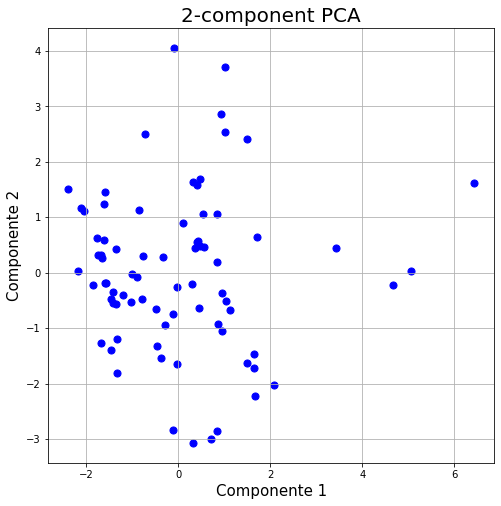

In [7]:
print("Gráfica PCA:")
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
targets = list(dataset['name'])
for target in targets:
    indicesToKeep = pca_final['name'] == target
    ax.scatter(pca_final.loc[indicesToKeep, 'componente 1'], 
               pca_final.loc[indicesToKeep, 'componente 2'], 
               c = 'b', s = 50)
ax.grid()
plt.savefig("p1-i1-pca.png")

In [8]:
print("Gráfica t-SNE:")
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="componente 1", y="componente 2",
    hue="name",
    palette=sns.color_palette("tab10", 77),
    data=tsne_final,
    legend="brief",
    alpha=1
).legend_.remove()
plt.savefig("p1-i1-tsne.png")

Gráfica t-SNE:


In [9]:
print("Gráfica UMAP:")
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="componente 1", y="componente 2",
    hue="name",
    palette=sns.color_palette("tab10", 77),
    data=umap_final,
    legend="brief",
    alpha=1
).legend_.remove()
plt.savefig("p1-i1-umap.png")

Gráfica UMAP:
